In [1]:
# # 최초 1회 실행
# # !git clone -b main https://github.com/open-mmlab/mmsegmentation.git
# !pip install -U openmim
# !mim install mmengine
# !mim install 'mmcv >= 2.0.0rc1'

In [1]:
%cd mmsegmentation

/home/user/ai_test/mmsegmentation


In [2]:
import mmcv
import mmengine
import matplotlib.pyplot as plt
import os.path as osp
import numpy as np
from PIL import Image
import matplotlib.patches as mpatches
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

In [3]:
config_file = 'configs/segformer/segformer_mit-b4_8xb1-160k_cityscapes-1024x1024.py'
checkpoint_file = 'checkpoints/segformer_mit-b4_8x1_1024x1024_160k_cityscapes_20211207_080709-07f6c333.pth'
save_pth_path = './work_dirs/tutorial'

In [4]:
import os.path as osp
import numpy as np
from PIL import Image
import cv2

# convert dataset annotation to semantic segmentation map

#수정 필요
data_root = '/home/user/ai_test/data'
img_dir = 'train_source_image2fish'
ann_dir = 'train_source_gt2fish'

# save pth 저장 경로
work_dir = './work_dirs/segformer'

# define class and plaette for better visualization
classes = ('lens','Road', 'Sidewalk', 'Construction', 'Fence', 'Pole', 'Traffic Light',
           'Traffic Sign', 'Nature', 'Sky', 'Person', 'Rider', 'Car', 'Background')
palette = [
    [0, 0, 0],
    [128, 0, 0],
    [255, 0, 0],
    [0, 255, 0],
    [0, 0, 255],
    [255, 255, 0],
    [128, 0, 128],
    [0, 255, 255],
    [255, 165, 0],
    [255, 192, 203],
    [0, 128, 0],
    [139, 69, 19],
    [0, 0, 128],
    [255,255,255]
]


In [5]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset
# from mmseg.datasets.builder import DATASETS
# from mmseg.datasets.custom import CustomDataset

# @DATASETS.register_module(force=True)
# class BuildingSemanticSegmentation(CustomDataset):
#     CLASSES = classes
#     PALETTE = palette
#     def __init__(self, split, **kwargs):
#         super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
#         assert osp.exists(self.img_dir) and self.split is not None

@DATASETS.register_module()
class BuildingSemanticSegmentation(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

In [6]:
from mmengine import Config
cfg = Config.fromfile(config_file)
# print(f'Config:\n{cfg.pretty_text}')

In [7]:

# # Since we use only one GPU, BN is used instead of SyncBN
# cfg.norm_cfg = dict(type='SyncBN', requires_grad=True)
# cfg.crop_size = (1024, 512)
# cfg.model.data_preprocessor.size = cfg.crop_size
# #cfg.model.backbone.norm_cfg = cfg.norm_cfg
# # cfg.model.backbone.norm_cfg = dict(type='BN', requires_grad=True)#cfg.norm_cfg
# # cfg.model.decode_head.norm_cfg = cfg.norm_cfg
# #cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# # modify num classes of the model in decode/auxiliary head
# # cfg.model.decode_head.num_classes = 13
# #cfg.model.auxiliary_head.num_classes = 2

# # Modify dataset type and path
# cfg.dataset_type = 'BuildingSemanticSegmentation'
# cfg.data_root = data_root

# cfg.train_dataloader.batch_size = 2
# #cfg.test_dataloader.batch_size = 16

# #cfg.model.decode_head.loss_decode = [dict(type='FocalLoss')]

#                                     #  [
#                                     #  dict(type='CrossEntropyLoss', use_sigmoid=True, loss_weight = 1.0),
#                                     #  dict(type='LovaszLoss', loss_weight = 10.0, reduction='none')]

# albu_train_transforms = [
#     #dict(type='RandomRotate90', p=0.5),
#     dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=0.5),
#     dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=0.5),
#     dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=0.5),
#     dict(type='MotionBlur', blur_limit=25, allow_shifted=True, always_apply=False, p=0.5),
#     dict(type='ZoomBlur', max_factor=1.31, step_factor=(0.01, 0.03), always_apply=False, p=0.5),
# ]

# cfg.train_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(type='LoadAnnotations'),
#     dict(
#         type='Albu',
#         transforms=albu_train_transforms,
#         keymap=dict(img='image', gt_semantic_seg='mask'),
#         update_pad_shape=True,
#         ),
#     dict(type='RandomFlip', prob=0.5),
#     #dict(type='RandomRotate',degree=90, prob=0.5),
#     dict(type='PhotoMetricDistortion'),
#     # RandomMosaic
#     dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=1),
#     #dict(type='Resize', scale=(1024, 512), keep_ratio=True),
#     dict(type='PackSegInputs')
# ]



# cfg.test_pipeline = [
#     dict(type='LoadImageFromFile'),
#     # dict(type='Resize', scale=(224, 224), keep_ratio=True),
#     # add loading annotation after ``Resize`` because ground truth
#     # does not need to do resize data transform
#     dict(type='LoadAnnotations'),
#     dict(type='PackSegInputs')
# ]


# cfg.train_dataloader.dataset.type = cfg.dataset_type
# cfg.train_dataloader.dataset.data_root = cfg.data_root
# cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
# cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
# cfg.train_dataloader.dataset.ann_file = data_root + '/splits/train.txt'

# cfg.val_dataloader.dataset.type = cfg.dataset_type
# cfg.val_dataloader.dataset.data_root = cfg.data_root
# cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
# cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
# cfg.val_dataloader.dataset.ann_file = data_root + '/splits/val.txt'

# cfg.test_dataloader = cfg.val_dataloader


# # Load the pretrained weights
# cfg.load_from = checkpoint_file

# # Set up working dir to save files and logs.
# cfg.work_dir = work_dir


# #수정 필요 (실행 확인을 위해 작은 숫자로 테스트해보고 되면 주석처리 된 숫자로 하시면 됩니다.)
# cfg.train_cfg.max_iters = 100000#100000
# cfg.train_cfg.val_interval = 5000#5000
# #cfg.train_cfg.val_evaluator = dict(type='IoUMetric', iou_metrics=['mDice'])
# cfg.default_hooks.logger.interval = 1000#1000
# cfg.default_hooks.checkpoint.save_best = "mIoU"
# cfg.val_evaluator = dict(type='IoUMetric', iou_metrics=['mIoU'])

# #cfg.train_cfg.val_evaluator = dict(interval=200, metric='mDice', pre_eval=True)
# #cfg.val_evaluator = dict(interval=4000, metric='mDice', pre_eval=True)
# #evaluation = dict(interval=4000, metric='mDice', pre_eval=True)


# cfg.default_hooks.checkpoint.interval = 5000#5000

# cfg.device = 'cuda'
# cfg.gpu_ids = 0

# # Set seed to facilitate reproducing the result
# cfg['randomness'] = dict(seed=0)

# # Let's have a look at the final config used for training
# #print(f'Config:\n{cfg.pretty_text}')

In [8]:

# Since we use only one GPU, BN is used instead of SyncBN
# cfg.norm_cfg = dict(type='SyncBN', requires_grad=True)
cfg.crop_size = (1024,512)
cfg.model.data_preprocessor.size = cfg.crop_size
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
# cfg.model.backbone.norm_cfg = dict(type='BN', requires_grad=True)#cfg.norm_cfg
# cfg.model.decode_head.norm_cfg = cfg.norm_cfg
#cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 13
#cfg.model.auxiliary_head.num_classes = 2

# Modify dataset type and path
cfg.dataset_type = 'BuildingSemanticSegmentation'
cfg.data_root = data_root

cfg.train_dataloader.batch_size = 2
#cfg.test_dataloader.batch_size = 16

cfg.model.decode_head.loss_decode = [dict(type='FocalLoss')]

                                    #  [
                                    #  dict(type='CrossEntropyLoss', use_sigmoid=True, loss_weight = 1.0),
                                    #  dict(type='LovaszLoss', loss_weight = 10.0, reduction='none')]

albu_train_transforms = [
    #dict(type='RandomRotate90', p=0.5),
    dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=0.5),
    dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=0.5),
    dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=0.5),
    dict(type='MotionBlur', blur_limit=25, allow_shifted=True, always_apply=False, p=0.3),
    dict(type='ZoomBlur', max_factor=1.31, step_factor=(0.01, 0.03), always_apply=False, p=0.3),
]

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        keymap=dict(img='image', gt_semantic_seg='mask'),
        update_pad_shape=True,
        ),
    dict(type='RandomFlip', prob=0.5),
    #dict(type='RandomRotate',degree=90, prob=0.5),
    dict(type='PhotoMetricDistortion'),
    # RandomMosaic
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=1),
    #dict(type='Resize', scale=(1024, 512), keep_ratio=True),
    dict(type='PackSegInputs')
]



cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    # dict(type='Resize', scale=(224, 224), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = data_root + '/splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = data_root + '/splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = work_dir


#수정 필요 (실행 확인을 위해 작은 숫자로 테스트해보고 되면 주석처리 된 숫자로 하시면 됩니다.)
cfg.train_cfg.max_iters = 100000#100000
cfg.train_cfg.val_interval = 5000#5000
#cfg.train_cfg.val_evaluator = dict(type='IoUMetric', iou_metrics=['mDice'])
cfg.default_hooks.logger.interval = 1000#1000
cfg.default_hooks.checkpoint.save_best = "mIoU"
cfg.val_evaluator = dict(type='IoUMetric', iou_metrics=['mIoU'])

#cfg.train_cfg.val_evaluator = dict(interval=200, metric='mDice', pre_eval=True)
#cfg.val_evaluator = dict(interval=4000, metric='mDice', pre_eval=True)
#evaluation = dict(interval=4000, metric='mDice', pre_eval=True)


cfg.default_hooks.checkpoint.interval = 5000#5000

cfg.device = 'cuda'
cfg.gpu_ids = 0

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
#print(f'Config:\n{cfg.pretty_text}')

Loads checkpoint by local backend from path: ./work_dirs/segformer1/best_mIoU_iter_10000.pth


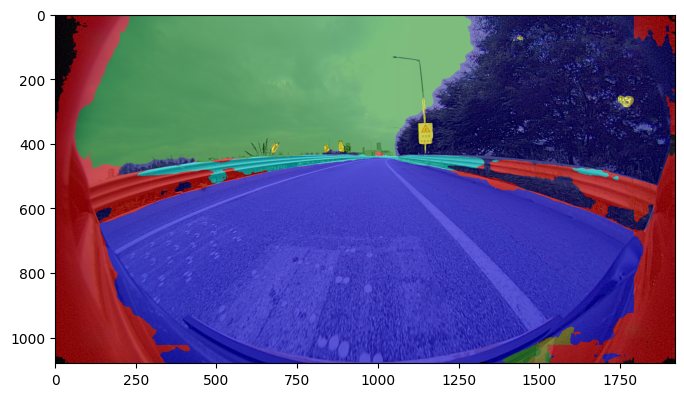

In [13]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

# Init the model from the config and the checkpoint
checkpoint_path = './work_dirs/segformer1/best_mIoU_iter_10000.pth'
# checkpoint_path = checkpoint_file'
model = init_model(cfg, checkpoint_path, 'cuda:0')

img = mmcv.imread(data_root + '/test_image/TEST_0002.png')
pred = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, pred)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [14]:
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [15]:
from glob import glob

test_image_path = sorted(glob(data_root + "/test_image/*"))

In [16]:
from scipy.optimize import leastsq
# image = augmented['image'].permute(1,2,0).numpy()
# Function to calculate the residuals for least squares circle fit
def calculate_residuals(c, x, y):
    xi = c[0]
    yi = c[1]
    ri = c[2]
    return ((x-xi)**2 + (y-yi)**2 - ri**2)
def make_mask_circle(image):
    # Initialize lists to store the coordinates of the first non-black pixels from left and right for each row
    x_coords = []
    y_coords = []

    non_vignetting_threshold = 10
    inner_circle_margin = 40
    inner_circle_margin_2 = 20
    # image_path = "./train_target_image/TRAIN_TARGET_0000.png"
    # img = cv2.imread("./train_target_image/TRAIN_TARGET_0000.png")
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Scan each row of the image
    for i in range(img_gray.shape[0]):

        # Scan from the left
        for j in range(img_gray.shape[1]):
            if np.any(img_gray[i,j] > non_vignetting_threshold):
                x_coords.append(j)
                y_coords.append(i)
                break

        # Scan from the right
        for j in range(img_gray.shape[1]-1, -1, -1):
            if np.any(img_gray[i,j] > non_vignetting_threshold):
                x_coords.append(j)
                y_coords.append(i)
                break

    # Convert the lists to numpy arrays
    x = np.array(x_coords)
    y = np.array(y_coords)

    # Initial guess for circle parameters (center at middle of image, radius half the image width)
    c0 = [img_gray.shape[1]/2, img_gray.shape[0]/2, img_gray.shape[1]/4]

    # Perform least squares circle fit
    c, _ = leastsq(calculate_residuals, c0, args=(x, y))

    img_color = image.copy()
    # Draw the circle on the original image
    cv2.circle(img_color, (int(c[0]), int(c[1])), int(c[2])-10, (0
                                                                 , 255, 0), 2);

    # Fill in the inside of the circle
    mask_valid = np.zeros((image.shape[0], image.shape[1])).astype(np.uint8)
    image2 = cv2.circle(mask_valid, (int(c[0]),image.shape[0]- int(c[2]*0.95)), int(c[2])-inner_circle_margin, 1, -1);
    # image2 = cv2.circle(image2, (int(c[0]),int(c[1])), int(c[2])-inner_circle_margin_2, 1, -1);
    
    return image2

In [17]:
from tqdm.auto import tqdm

answer = []
for path in tqdm(test_image_path):
  img = mmcv.imread(path)
  mask_valid = make_mask_circle(img) # make mask
  model_pred = inference_model(model, img)
  outputs = model_pred.pred_sem_seg.data
  outputs = outputs.squeeze()
  outputs = outputs.cpu().numpy()
  outputs = cv2.copyTo(outputs,mask_valid) # overlap mask

  pred = outputs.astype(np.uint8)
  pred = Image.fromarray(pred) # 이미지로 변환
  pred = pred.resize((960, 540), Image.NEAREST) # 960 x 540 사이즈로 변환
  pred = np.array(pred) # 다시 수치로 변환
  # class 0 ~ 11에 해당하는 경우에 마스크 형성 / 12(배경)는 제외하고 진행
  # class 1 ~ 12
  for class_id in range(1,13):
      class_mask = (pred == class_id).astype(np.uint8)
      if np.sum(class_mask) > 0: # 마스크가 존재하는 경우 encode
          mask_rle = rle_encode(class_mask)
          answer.append(mask_rle)
      else: # 마스크가 존재하지 않는 경우 -1
          answer.append(-1)


/home/user/anaconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1898 [00:00<?, ?it/s]

100%|██████████| 1898/1898 [24:35<00:00,  1.29it/s]


In [18]:
import pandas as pd
submit = pd.read_csv(data_root + '/sample_submission.csv')
submit['mask_rle'] = answer
submit
submit.to_csv('./submit_4.csv', index=False)

1
2
3
4
5
6
7
8
9
10
11
12
